In [197]:
%matplotlib nbagg
import atomap.api as am
import pandas as pd

import numpy as np
import atomap.dummy_data as dummy_data
import scipy.ndimage
import matplotlib.patches 
from ncempy.io import dm
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import hyperspy.api as hs
#for fft plotting
from scipy import fftpack
from matplotlib.colors import LogNorm
#For filtering
import cv2
import os
#for peak detection

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

from mpl_toolkits.axes_grid1 import make_axes_locatable

<IPython.core.display.Javascript object>


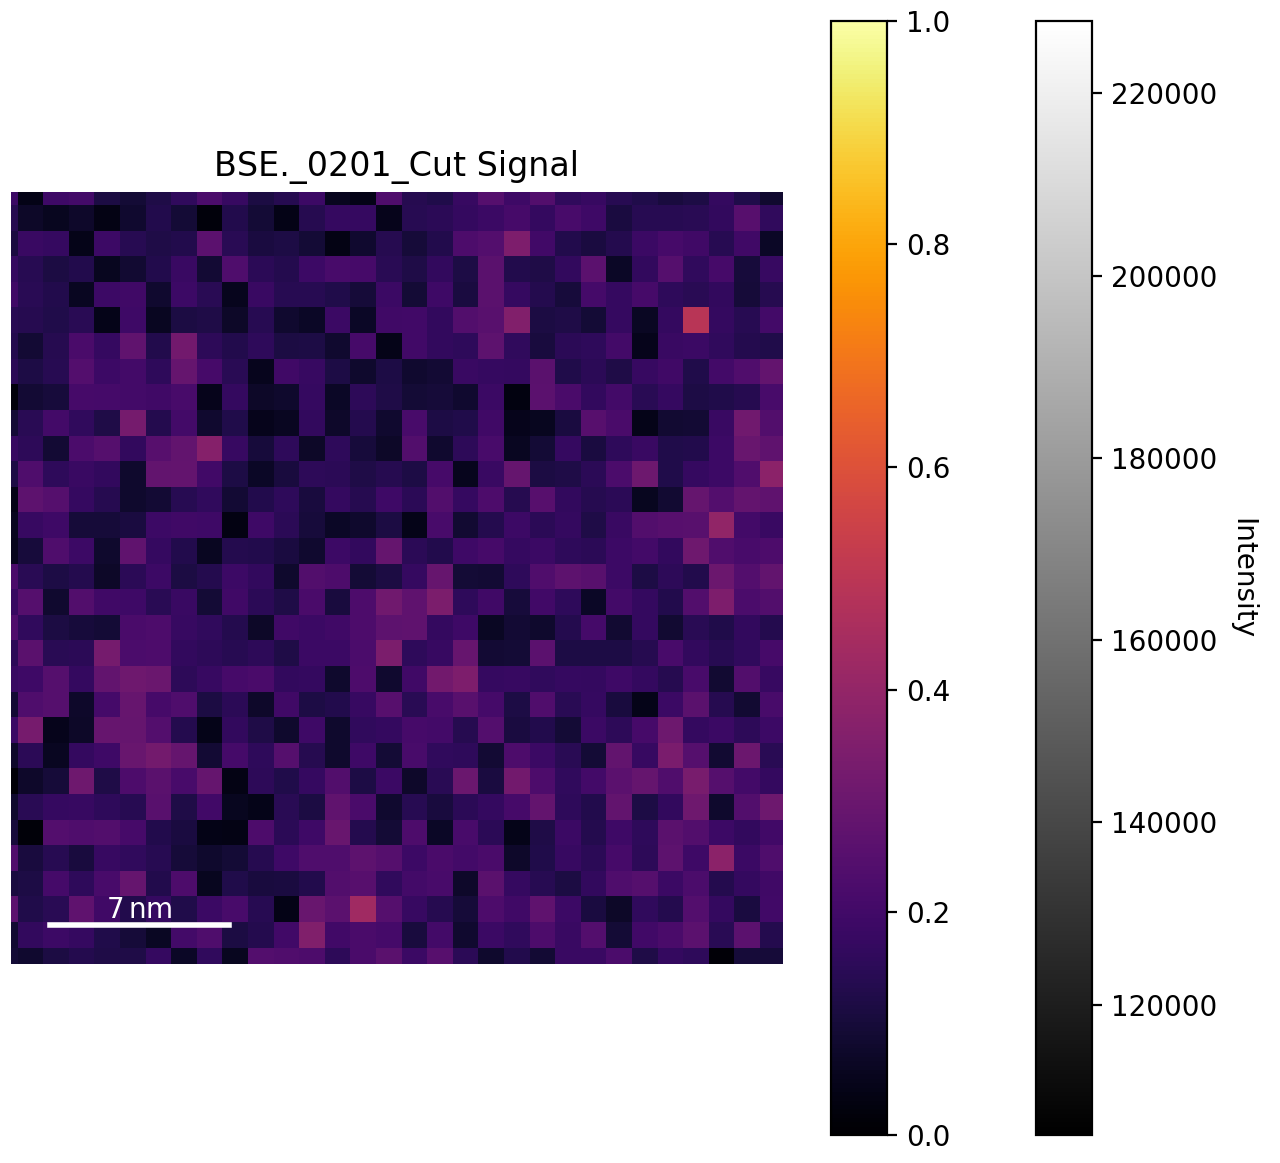

numpy.ndarray

In [88]:
im01 = hs.load('Data/BSE._0201_Cut.dm4')
im02 = hs.load('Data/BSE._0215_Cut.dm4')
im03 = hs.load('Data/BSE._0219_Cut.dm4')
im04 = hs.load('data/BSE._0211.dm4')
im01.plot()
type(im01.data)

In [4]:
#normalizing data:
norm_01 = (im01.data - im01.data.min())/np.ptp(im01.data)
norm_02 = (im02.data - im02.data.min())/np.ptp(im02.data)
norm_03 = (im03.data - im03.data.min())/np.ptp(im03.data)
norm_04 = (im04.data - im04.data.min())/np.ptp(im04.data)


In [89]:
#plotting normalized data and its fft

#plt.imshow(norm_01, cmap=plt.cm.inferno) #show the single image from the data file

plt.imshow(norm_02, cmap=plt.cm.inferno)

# scalebar = ScaleBar((im02['pixelSize'][0])*1e-9)  # 1 pixel = 2.2736310958862305e-11 meters
# plt.gca().add_artist(scalebar)
# scalebar.location = 'lower right'
# scalebar.box_alpha = 0.2
# scalebar.length_fraction = 0.2

plt.axis('off')
plt.colorbar()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()
#plt.savefig('images/hrstem02.png',transparent=True, bbox_inches='tight', pad_inches=0)

<IPython.core.display.Javascript object>


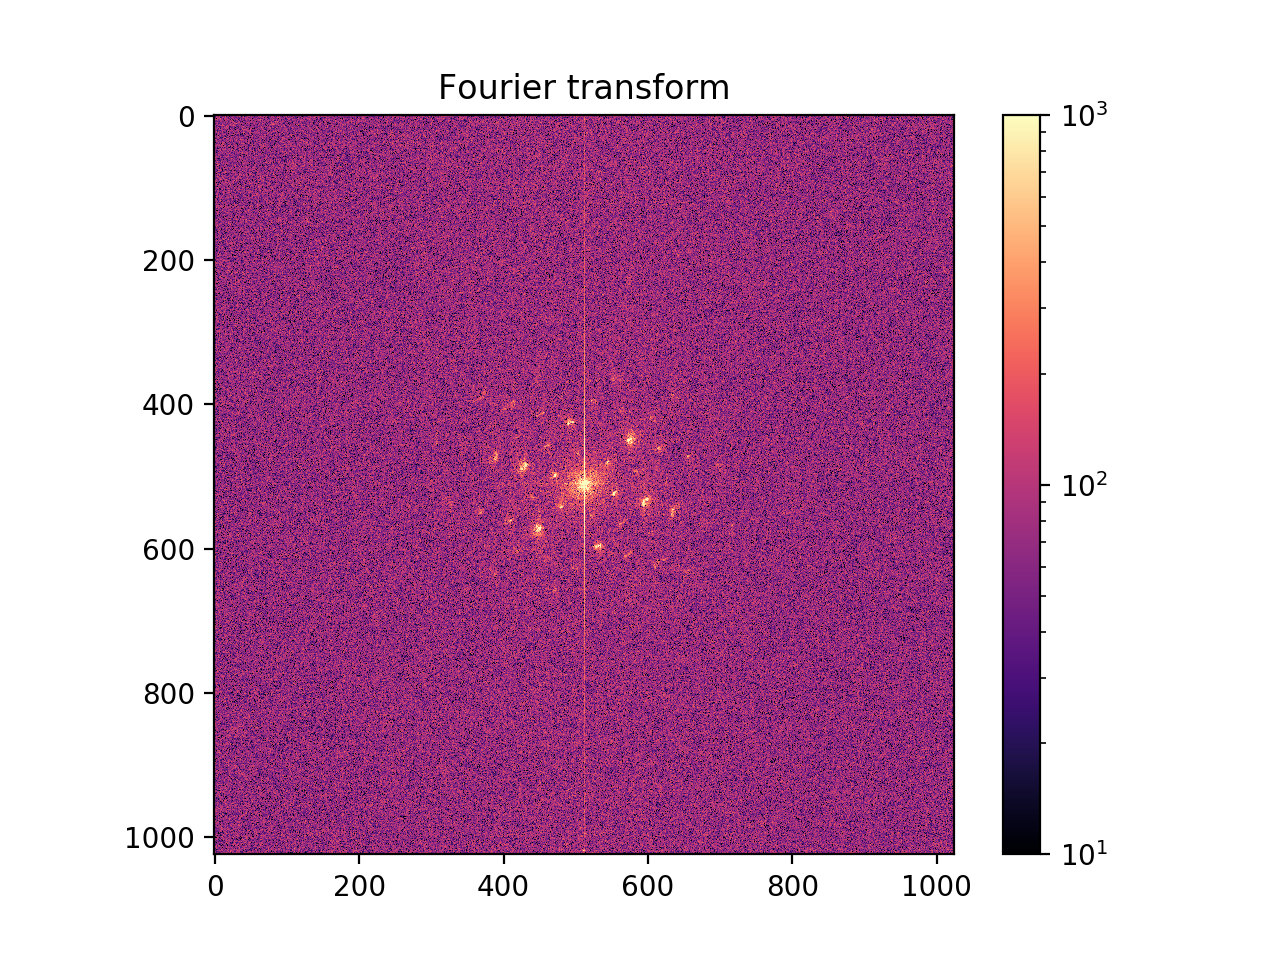

In [177]:
# FFT
# taking fft of all images
im01_fft = fftpack.fft2(norm_01)
im02_fft = fftpack.fft2(norm_02)
im03_fft = fftpack.fft2(norm_03)

def plot_spectrum(im02_fft):
    from matplotlib.colors import LogNorm
    
    # A logarithmic colormap
    plt.imshow(np.fft.fftshift(np.abs(im02_fft)), 
               norm=LogNorm(vmin=10, vmax = 1000), 
               cmap=plt.cm.magma)
               
    plt.colorbar()

plt.figure()
plot_spectrum(im02_fft)
plt.title('Fourier transform')

plt.show()

<IPython.core.display.Javascript object>


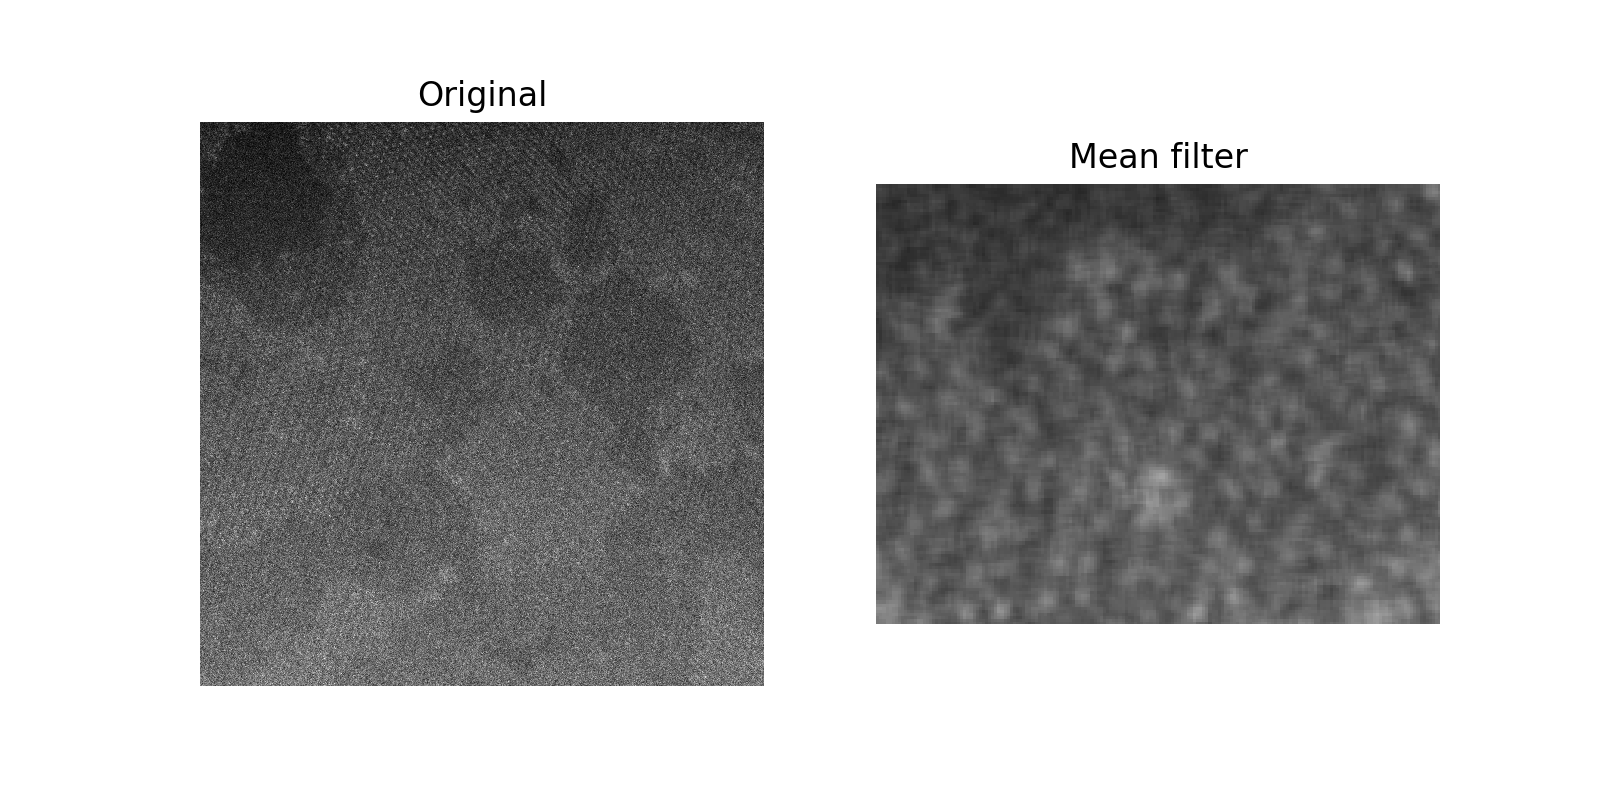

In [281]:
figure_size = 5
norm_01_filt = cv2.blur(norm_01,(figure_size, figure_size))
norm_02_filt = cv2.blur(norm_02,(figure_size, figure_size))
norm_03_filt = cv2.blur(norm_03,(figure_size, figure_size))
norm_04_filt = cv2.blur(norm_04,(figure_size, figure_size))


plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(norm_02, cmap='gray'),plt.title('Original')
plt.axis('off')
#plt.colorbar()

plt.subplot(122) 
plt.imshow(norm_02_filt, cmap='gray'),plt.title('Mean filter')
plt.axis('off')
#plt.colorbar()

plt.show()

<IPython.core.display.Javascript object>


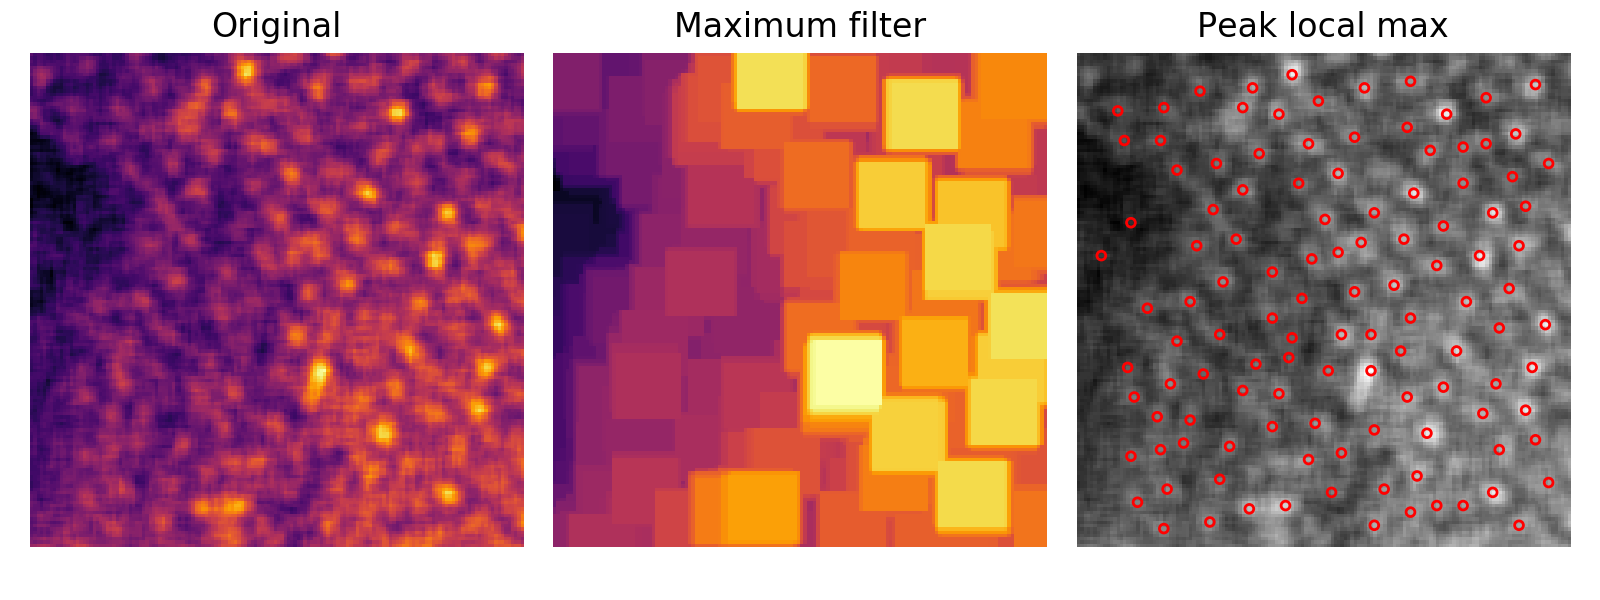

In [291]:
#im = norm_01_filt[400:600, 600:800]
#im = norm_01_filt[350:550,600:800]
#im = norm_02_filt[50:250, 300:500]
#im = norm_02_filt[190:390, 470:670]
im = norm_02_filt[80:230, 210:360]
#im = norm_03_filt[380:480,475:575] bad
#im = norm_04_filt[700:900,200:400] 


# image_max is the dilation of im with a structuring element defined by 'size'

image_max = ndi.maximum_filter(im, size=20, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=5)

# display results
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.inferno)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.inferno)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].scatter(coordinates[:, 1], coordinates[:, 0], s=10, facecolors='none', edgecolors='r')
#ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'b.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()
plt.savefig('images/peak_detection_hrstem01.png',transparent=True, bbox_inches='tight', pad_inches=0)

In [292]:
local_max_values = image_max[coordinates[:,1],coordinates[:,0]]
print(local_max_values)

[0.33469939 0.33097483 0.3862555  0.28916791 0.38161656 0.3411671
 0.38161656 0.38161656 0.33000669 0.34171205 0.38188732 0.3862555
 0.3758833  0.33829139 0.38188732 0.37141202 0.38161656 0.38091402
 0.38337193 0.35502943 0.38188732 0.38337193 0.37141202 0.28558131
 0.38188732 0.3777813  0.36112795 0.38091402 0.34551295 0.37542083
 0.38337193 0.3777813  0.33634234 0.32280403 0.38337193 0.34007524
 0.37542083 0.3777813  0.3515609  0.33256893 0.37542083 0.40432449
 0.34007524 0.33634234 0.32354634 0.32051868 0.34007524 0.32196083
 0.40432449 0.32603838 0.3201954  0.40432449 0.32632337 0.32603838
 0.28898233 0.31608889 0.40432449 0.31204743 0.30725359 0.30859534
 0.32603838 0.30650662 0.32632337 0.35447883 0.31183092 0.31185596
 0.29832453 0.29007002 0.27055127 0.30859534 0.38461918 0.25906168
 0.35447883 0.29778105 0.25906168 0.2835272  0.28106731 0.2835272
 0.31658204 0.27690435 0.29614719 0.2571141  0.28106731 0.33552761
 0.27024222 0.28106731 0.27315352 0.27690435 0.29109978 0.2769043

In [293]:
df = pd.DataFrame({'x': coordinates[:,1], 'y': coordinates[:,0],'intensity': local_max_values})

<IPython.core.display.Javascript object>


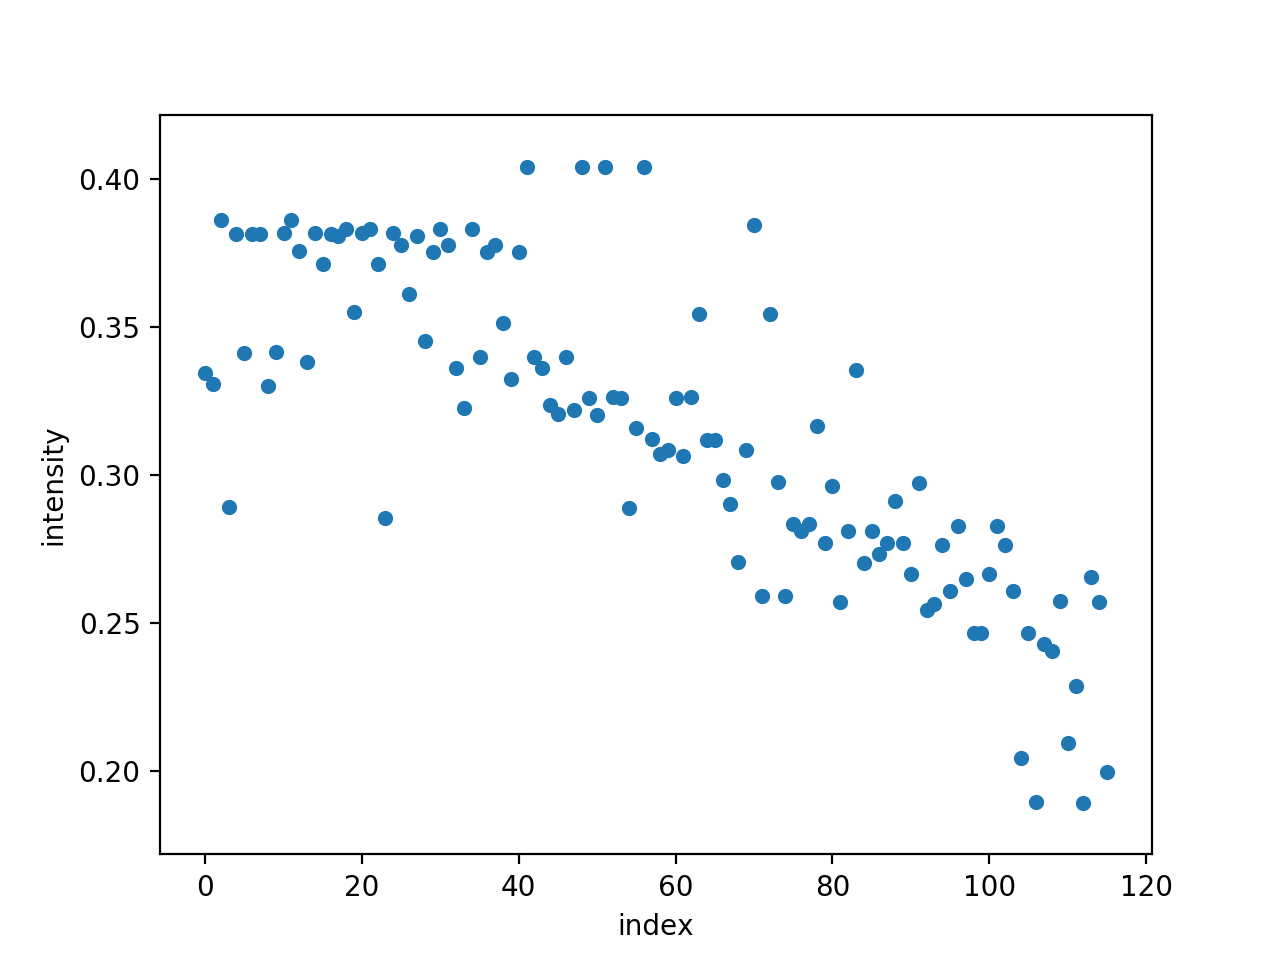

In [294]:
df.reset_index().plot.scatter(x='index', y='intensity')

<IPython.core.display.Javascript object>


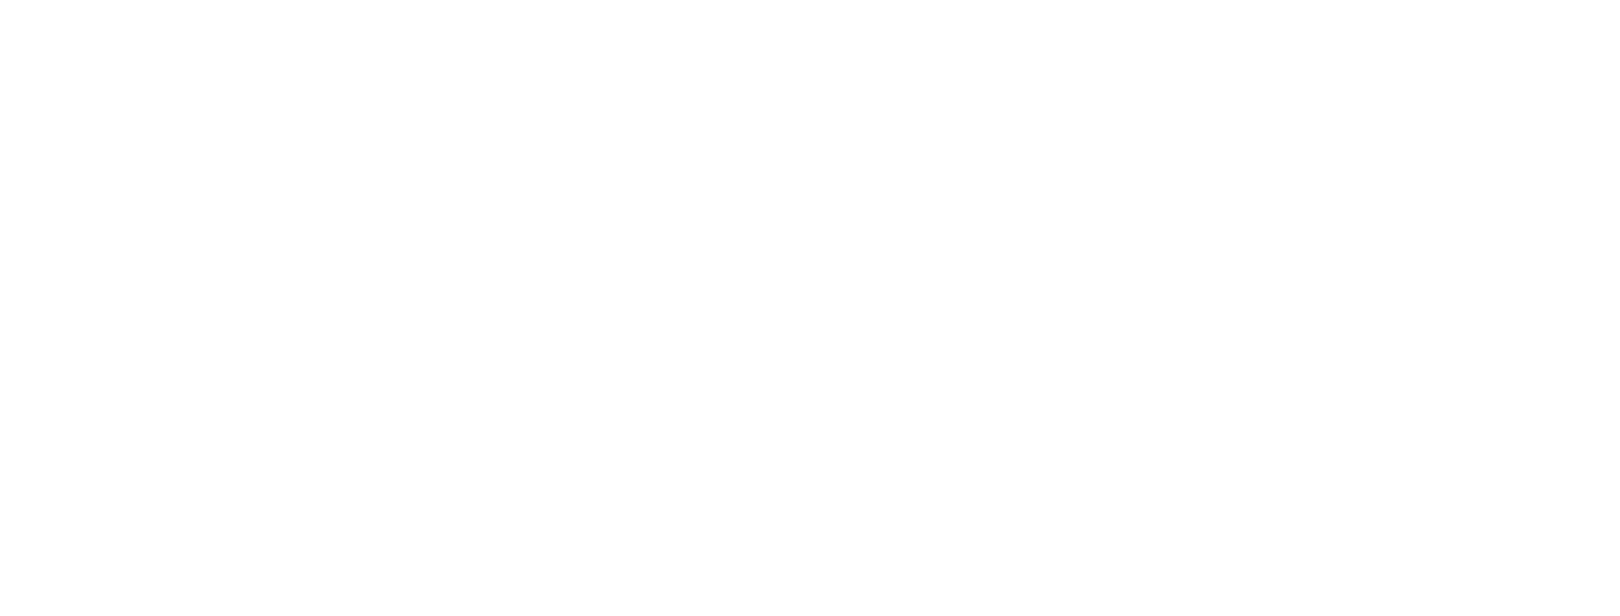

In [295]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax0=ax[0].imshow(im, cmap=plt.cm.inferno)
ax[0].axis('off')
ax[0].set_title('Original')

ax1=ax[1].imshow(im, cmap=plt.cm.gray)
ax[1].autoscale(False)
ax[1].scatter(coordinates[:, 1], coordinates[:, 0], c=local_max_values, s=10, cmap='Reds')
ax[1].axis('off')
ax[1].set_title('Peak local max')

df2=df[(df['intensity']<0.36) & (df['intensity']>0.325)]
df2

ax2=ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].scatter(df2['x'], df2['y'], s=10, facecolors='r')
ax[2].axis('off')
ax[2].set_title('High intensity positions')

cbar1 = fig.colorbar(a0, ax=axes[1], fraction=0.046, pad=0.04)
fig.tight_layout()
plt.show()
plt.savefig('images/peak_detection_hrstem01.png',transparent=True, bbox_inches='tight', pad_inches=0)

<IPython.core.display.Javascript object>


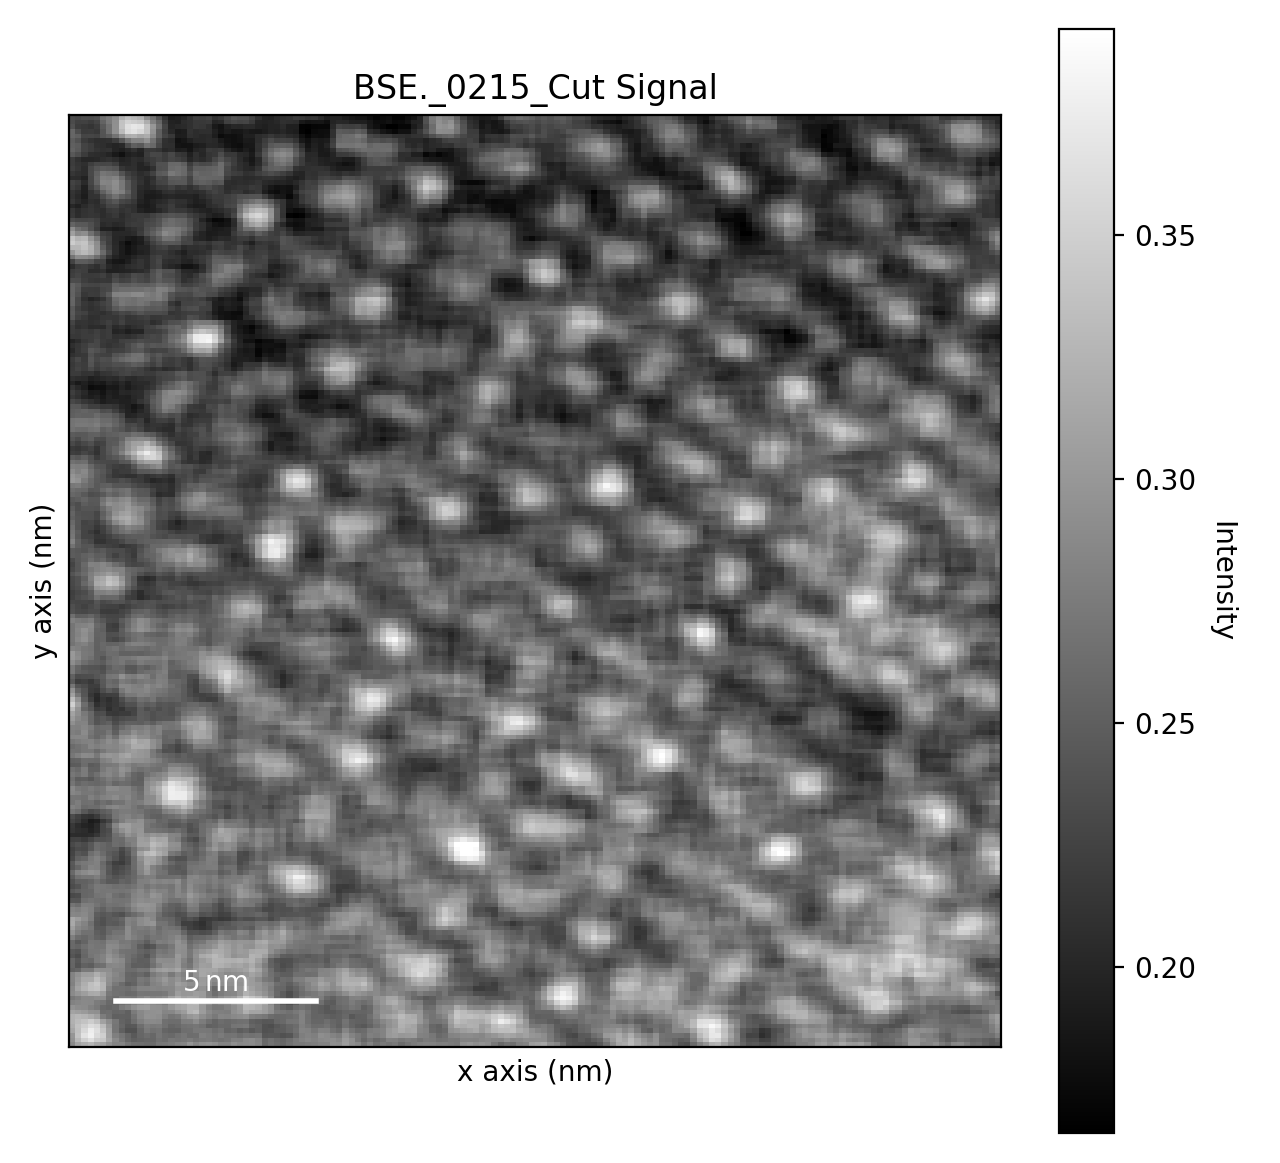

In [9]:
im02.data=im
#im02 = im02.isig[50:250, 300:450]
im02.plot()

100%|██████████| 206/206 [00:00<00:00, 6173.38it/s]


<IPython.core.display.Javascript object>


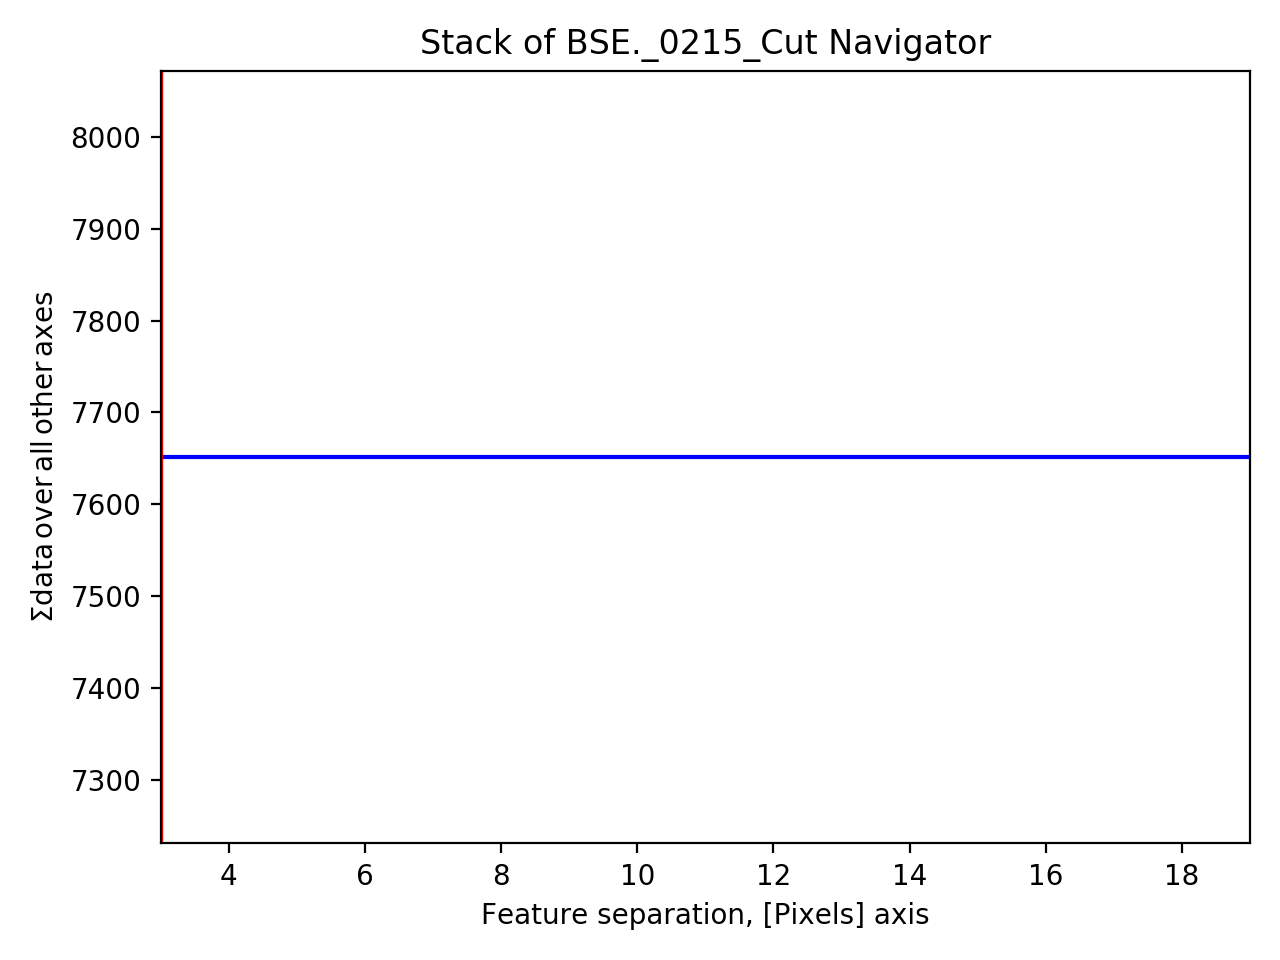

<IPython.core.display.Javascript object>


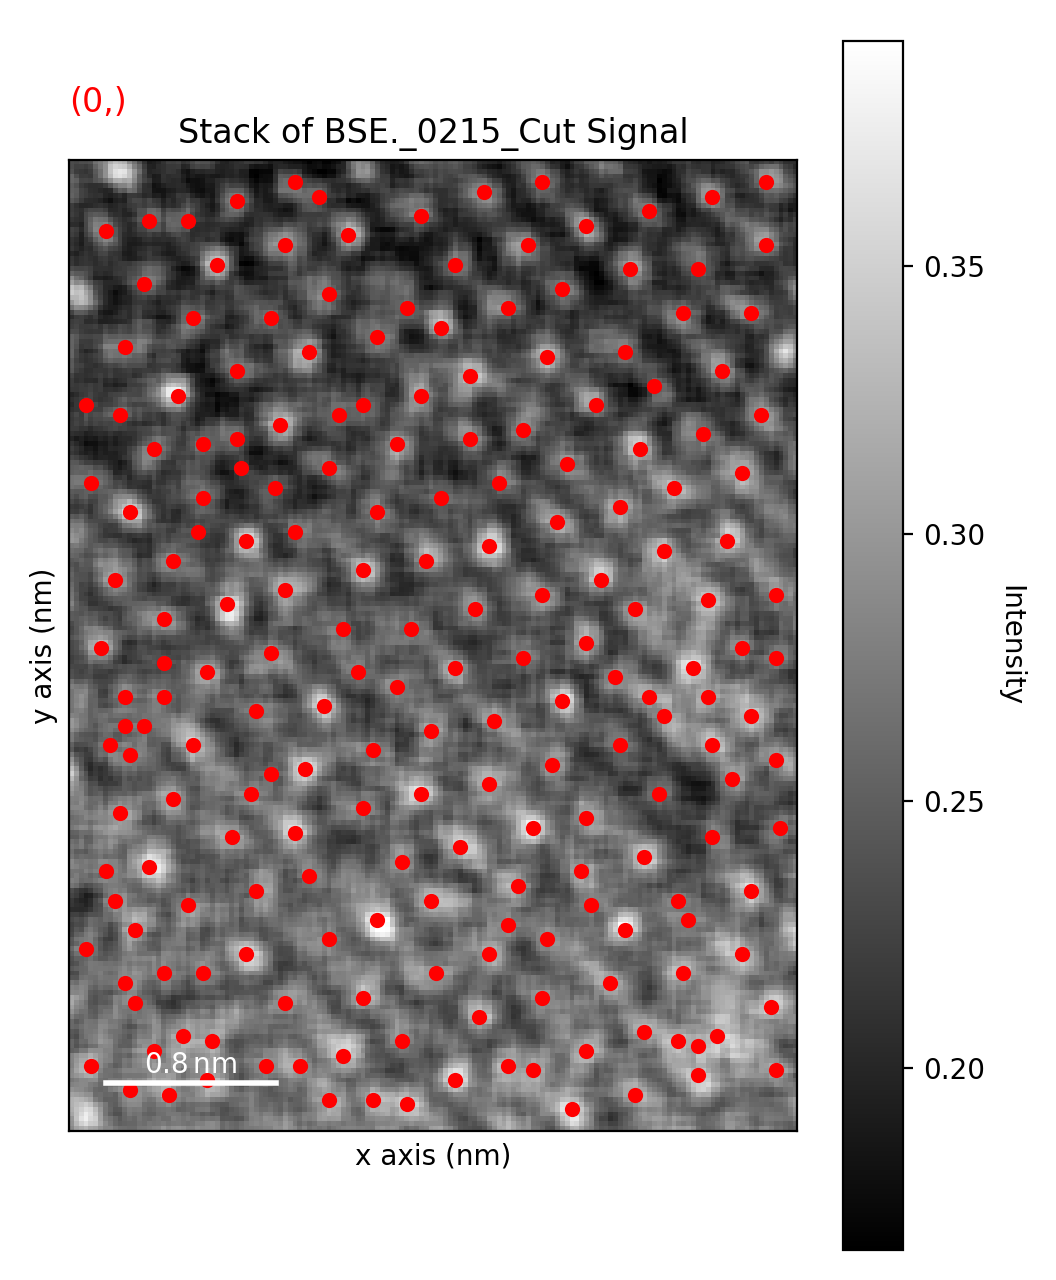

In [10]:
im02_peaks = am.get_feature_separation(im02, separation_range=(3, 20))
im02_peaks.plot()

In [11]:
atom_positions = am.get_atom_positions(im02, separation=5)
sublattice = am.Sublattice(atom_positions, image=im02.data)
sublattice

<Sublattice,  (atoms:165,planes:0)>

In [12]:
sublattice.find_nearest_neighbors()
sublattice.refine_atom_positions_using_center_of_mass()
sublattice.refine_atom_positions_using_2d_gaussian()

Gaussian fitting: 100%|██████████| 165/165 [00:02<00:00, 63.38it/s]


100%|██████████| 165/165 [00:00<00:00, 5503.85it/s]


<IPython.core.display.Javascript object>


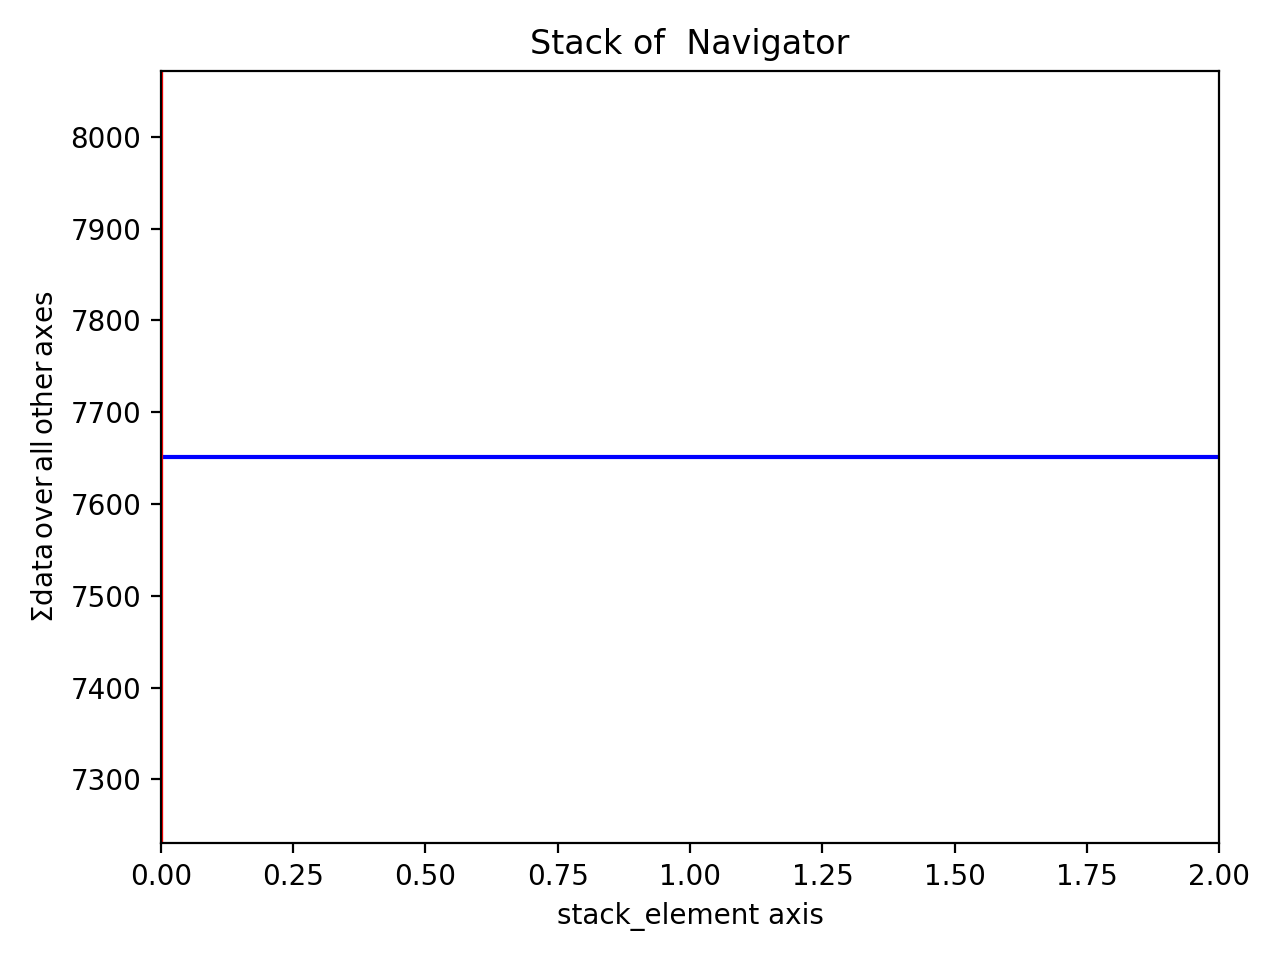

<IPython.core.display.Javascript object>


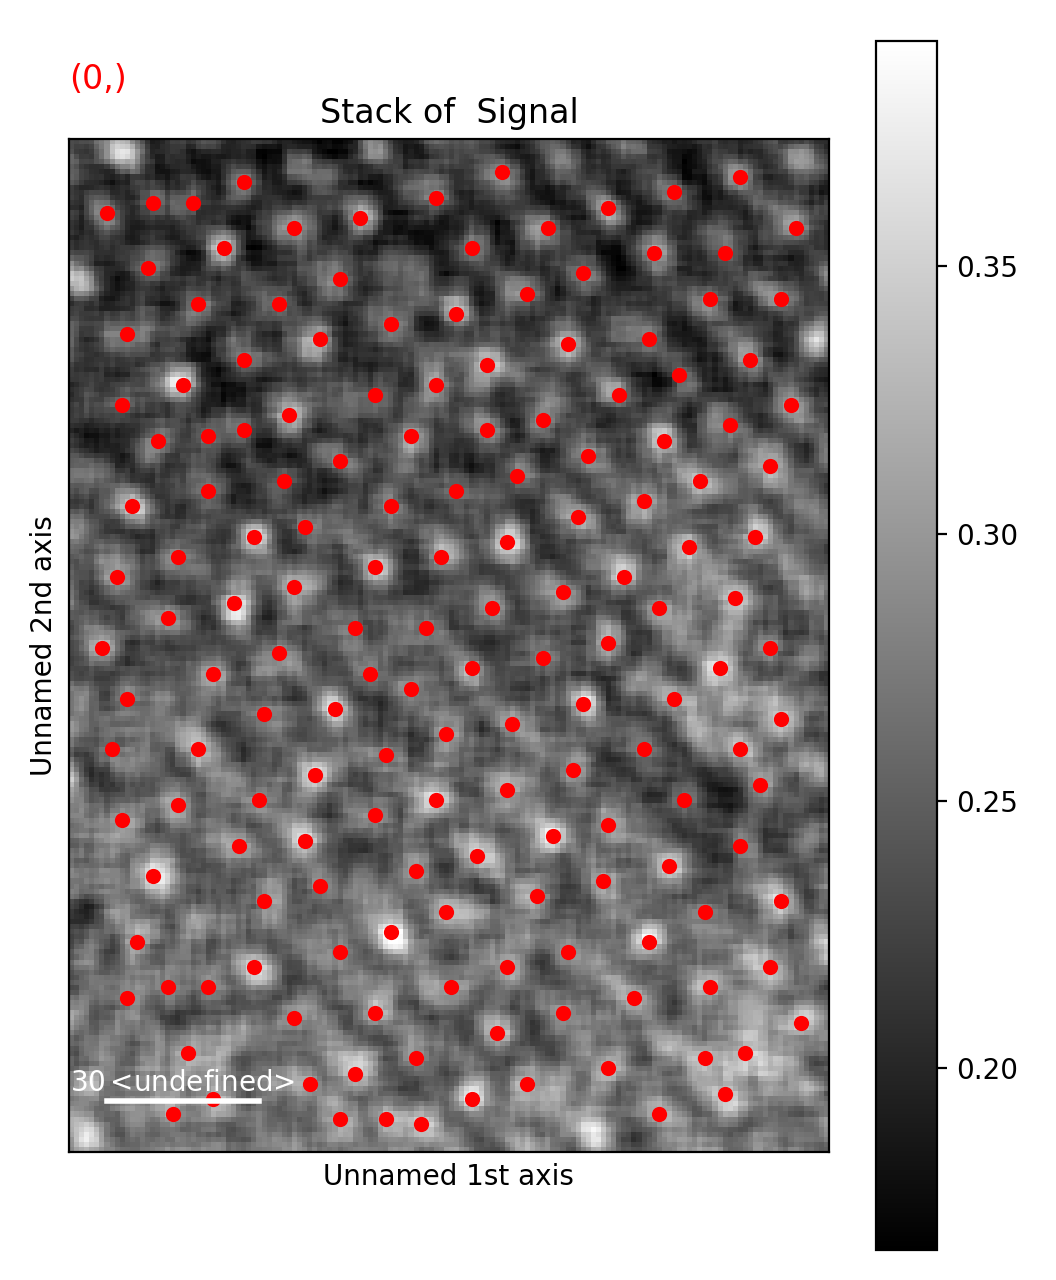

In [13]:
sublattice.get_position_history().plot()

In [14]:
atom_list = sublattice.atom_list
atom_list[0] 

<Atom_Position,  (x:69.3,y:194.0,sx:1.1,sy:1.6,r:1.3,e:1.4)>

<IPython.core.display.Javascript object>


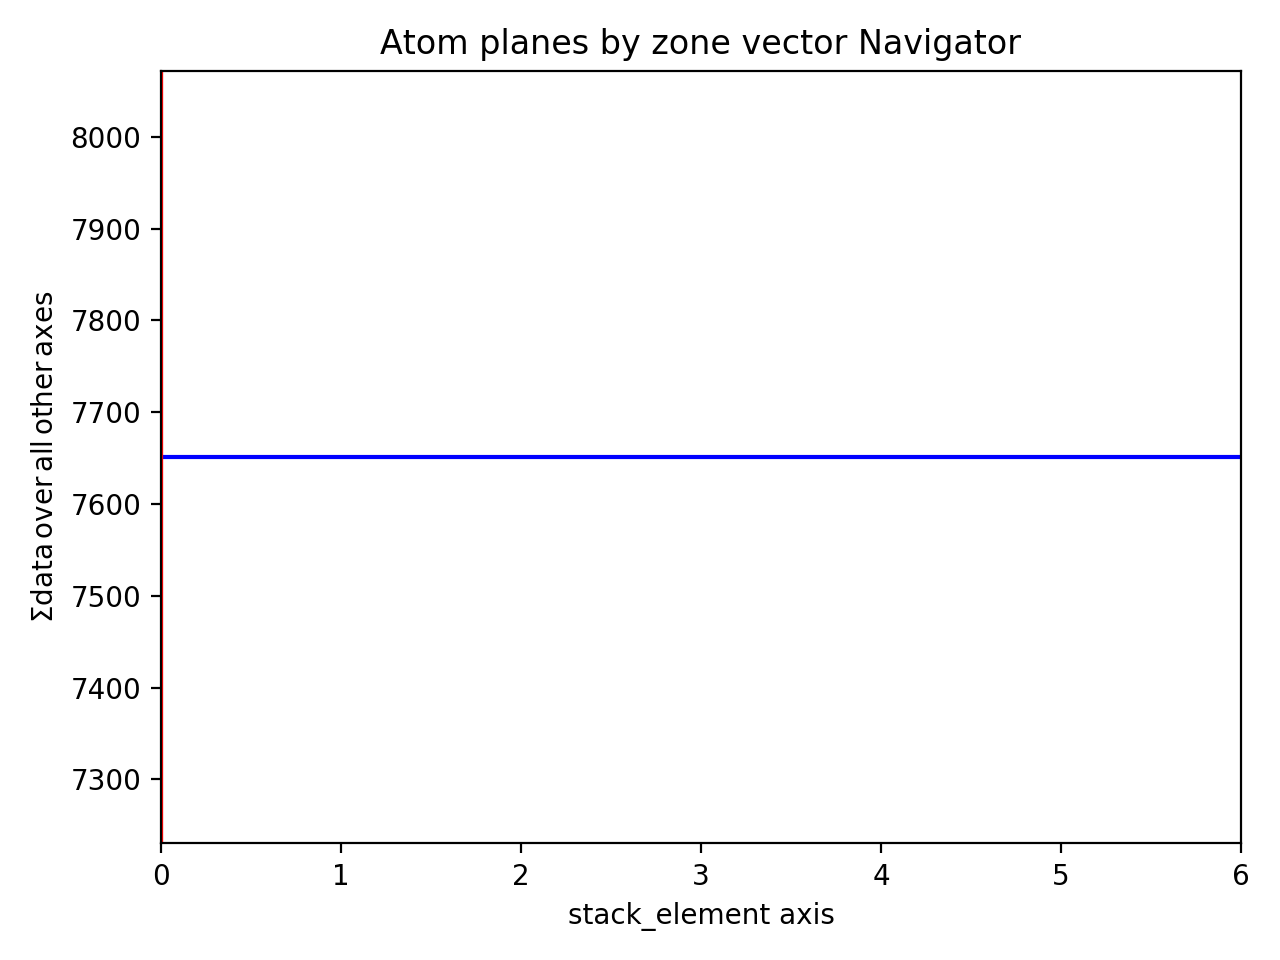

<IPython.core.display.Javascript object>


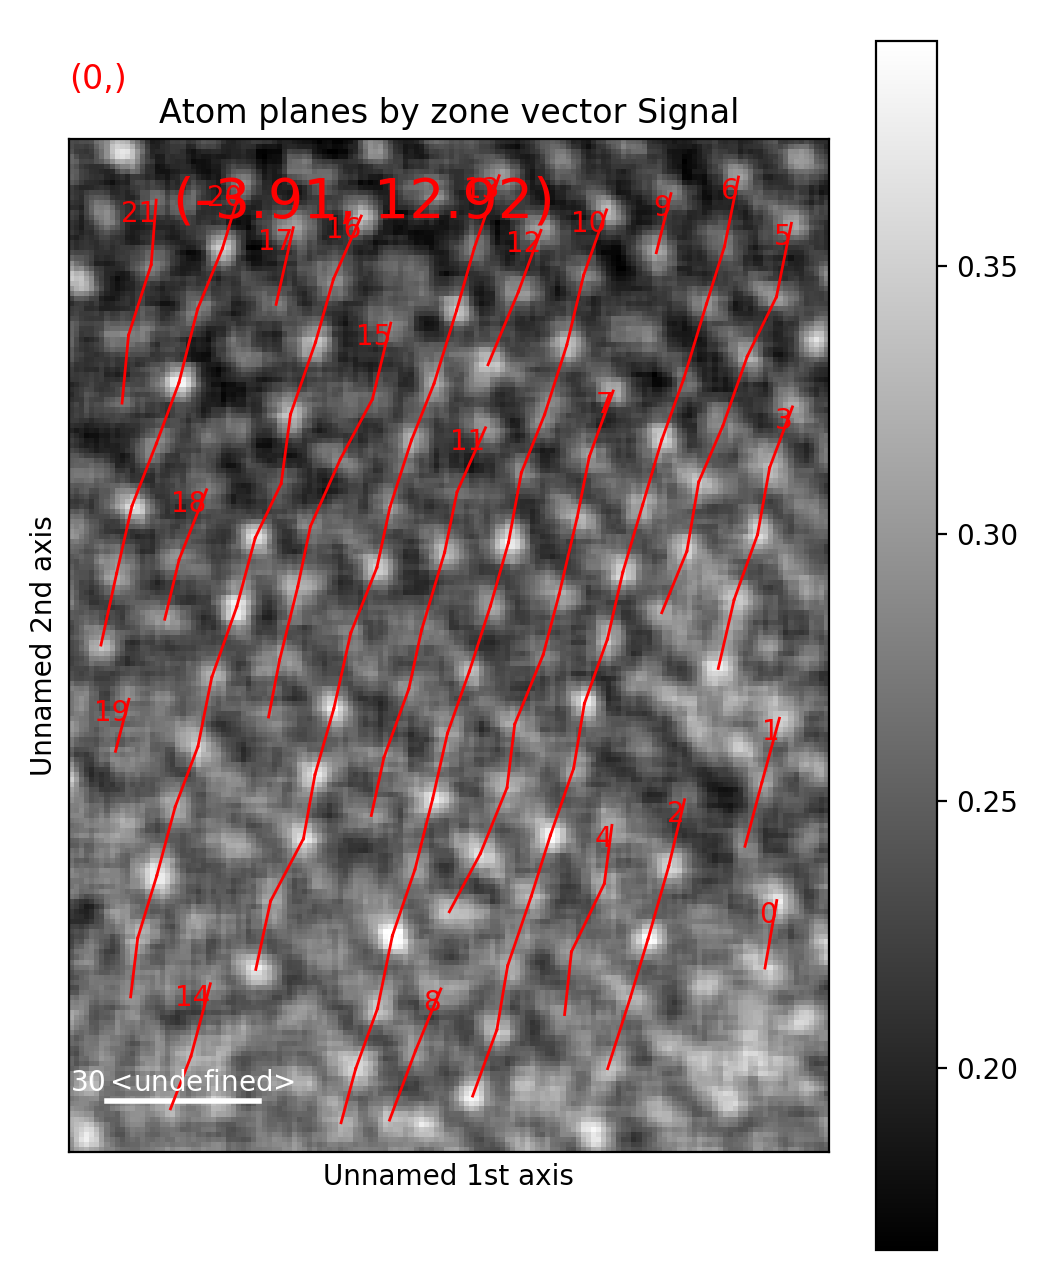

In [15]:
sublattice.construct_zone_axes()
sublattice.plot_planes()

In [16]:
>>> import atomap.api as am
>>> s = am.dummy_data.get_atom_counting_signal()
>>> atom_positions = am.get_atom_positions(im02, separation=5)
>>> sublattice = am.Sublattice(atom_positions, im02)
>>> sublattice.construct_zone_axes()
>>> sublattice.refine_atom_positions_using_2d_gaussian()

Gaussian fitting: 100%|██████████| 165/165 [00:02<00:00, 66.61it/s]


<IPython.core.display.Javascript object>


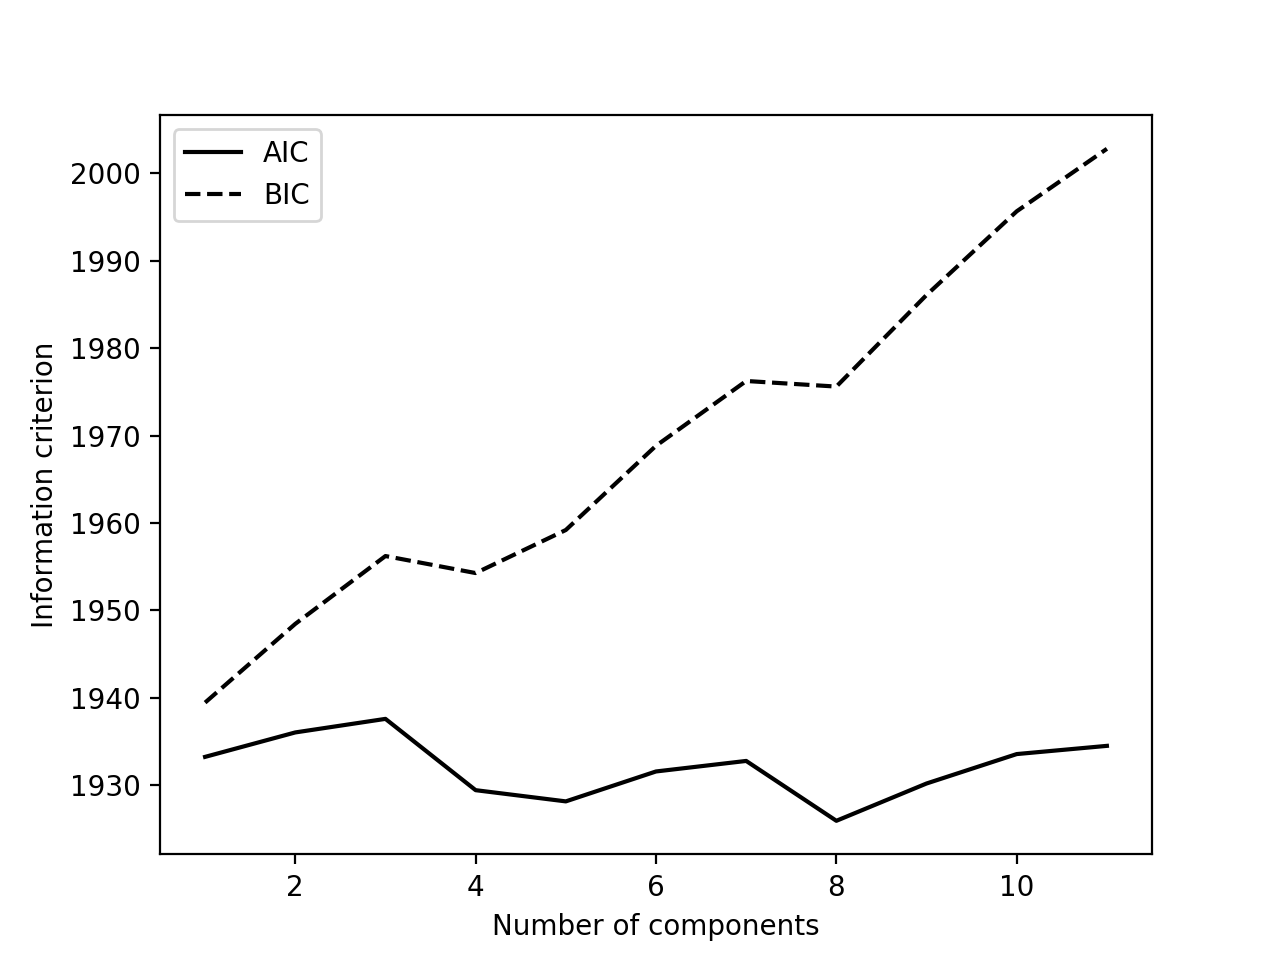

In [26]:
>>> models = am.quant.get_statistical_quant_criteria([sublattice], 12)


<IPython.core.display.Javascript object>


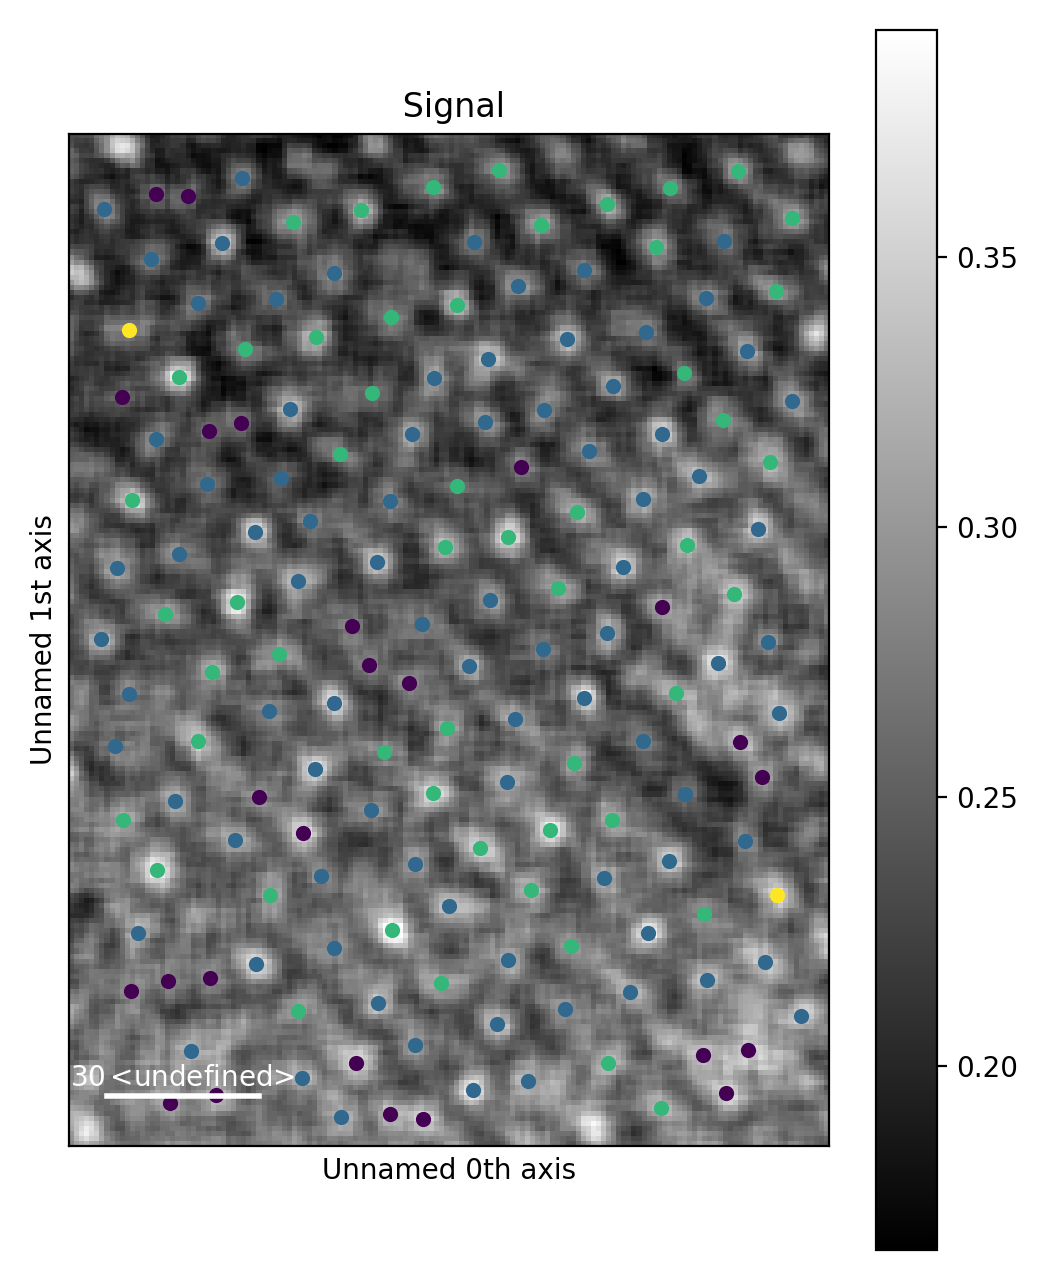

<IPython.core.display.Javascript object>


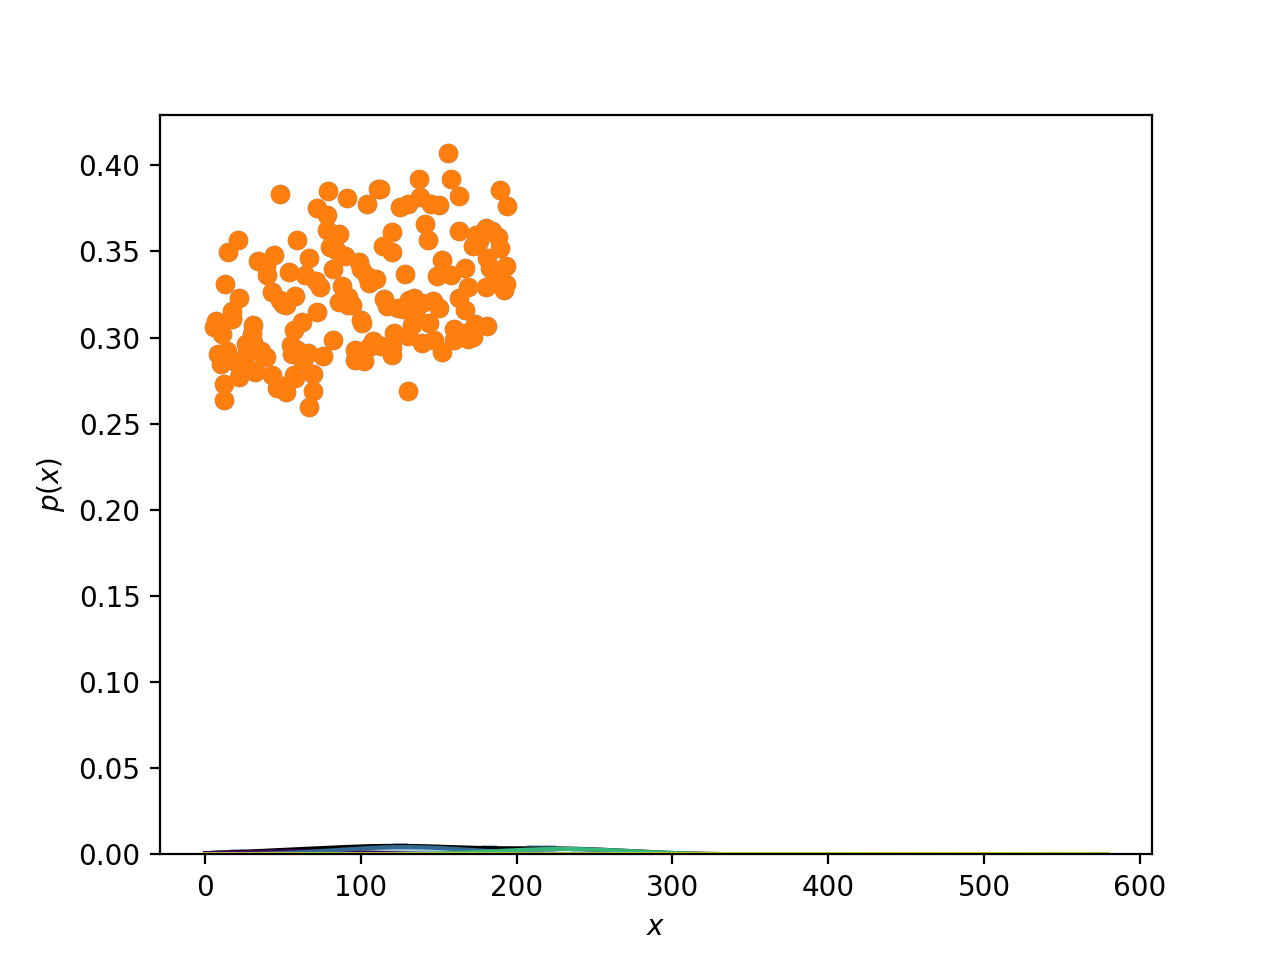

In [27]:
>>> model = models[3] # 4th model
>>> atom_lattice = am.quant.statistical_quant(sublattice.image, sublattice, model, 4)

Integrating: 100%|██████████| 165/165 [00:01<00:00, 86.52it/s]


<IPython.core.display.Javascript object>


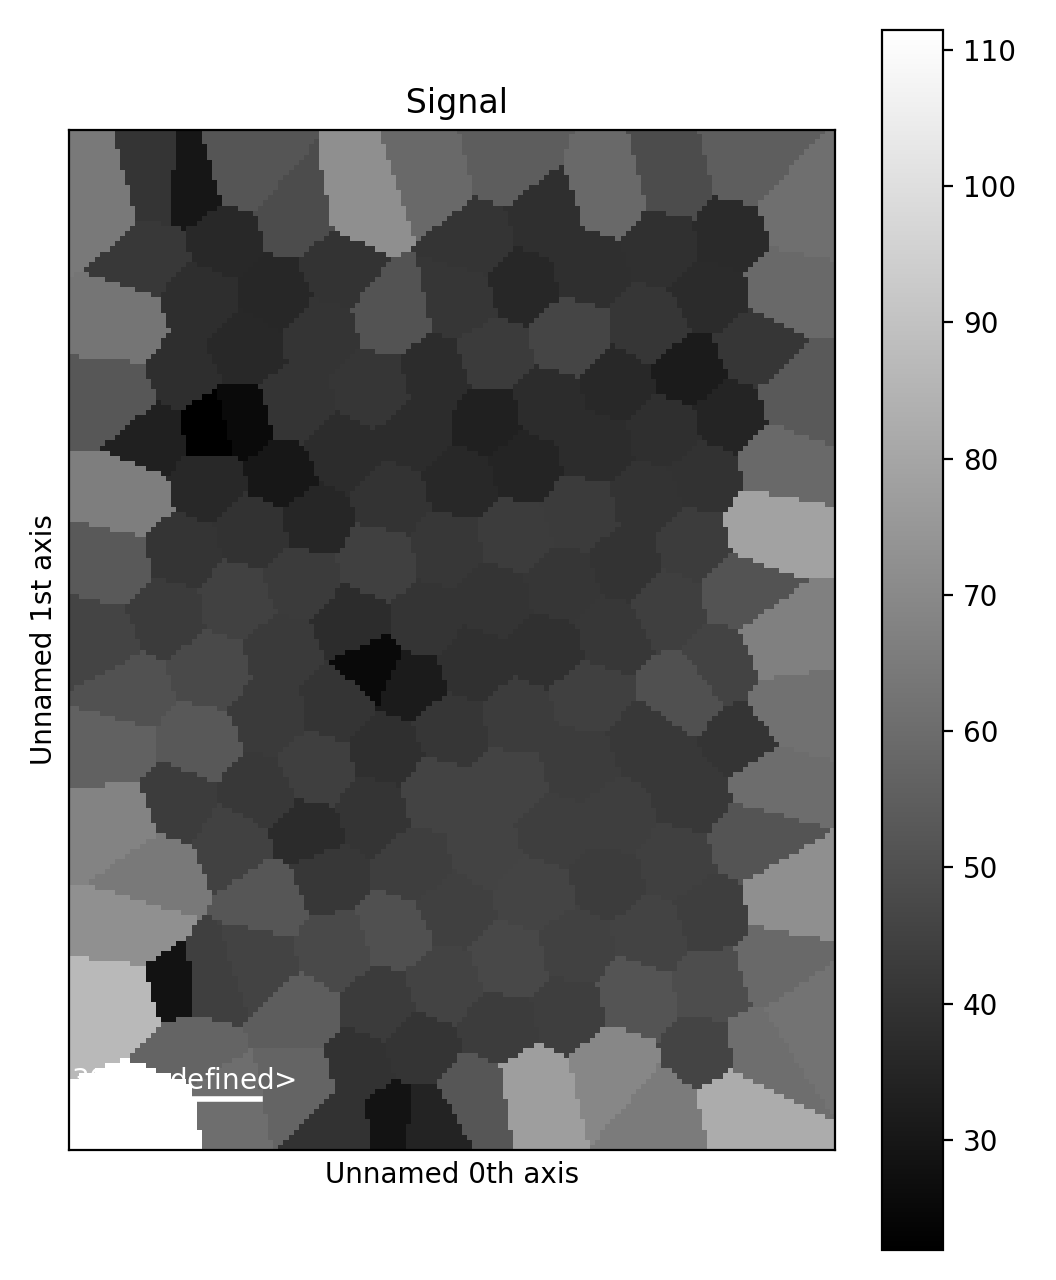

In [19]:
>>> i_points, i_record, p_record = atom_lattice.integrate_column_intensity()
>>> i_record.plot()

Integrating: 100%|██████████| 165/165 [00:02<00:00, 81.20it/s]


<IPython.core.display.Javascript object>


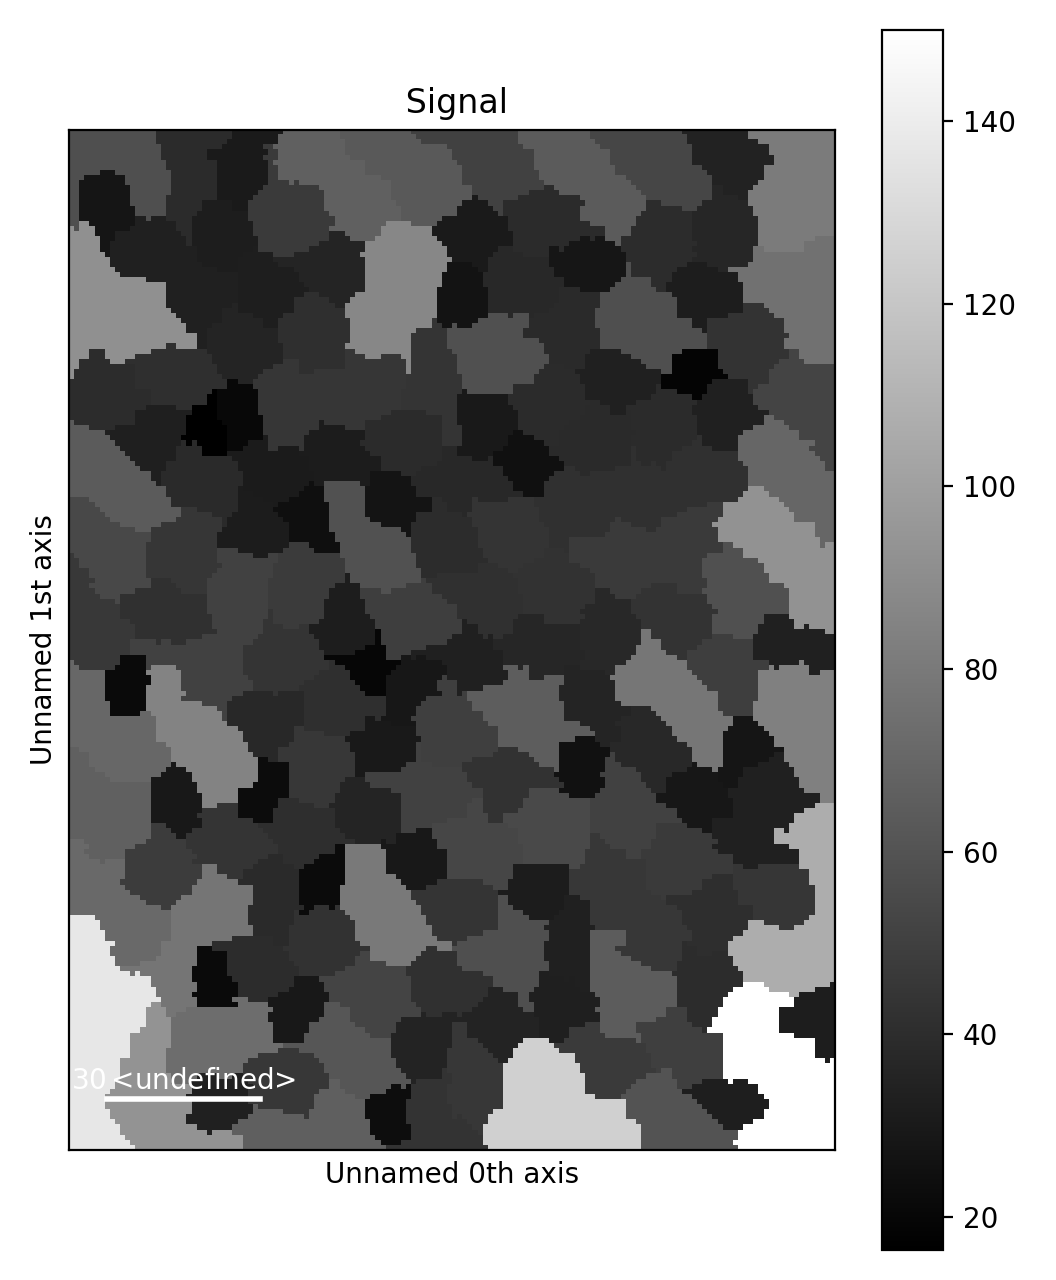

In [20]:
>>> i_points, i_record, p_record = atom_lattice.integrate_column_intensity(
...         method='Watershed')
>>> i_record.plot()

Gaussian fitting: 100%|██████████| 104/104 [00:02<00:00, 49.46it/s]


<IPython.core.display.Javascript object>


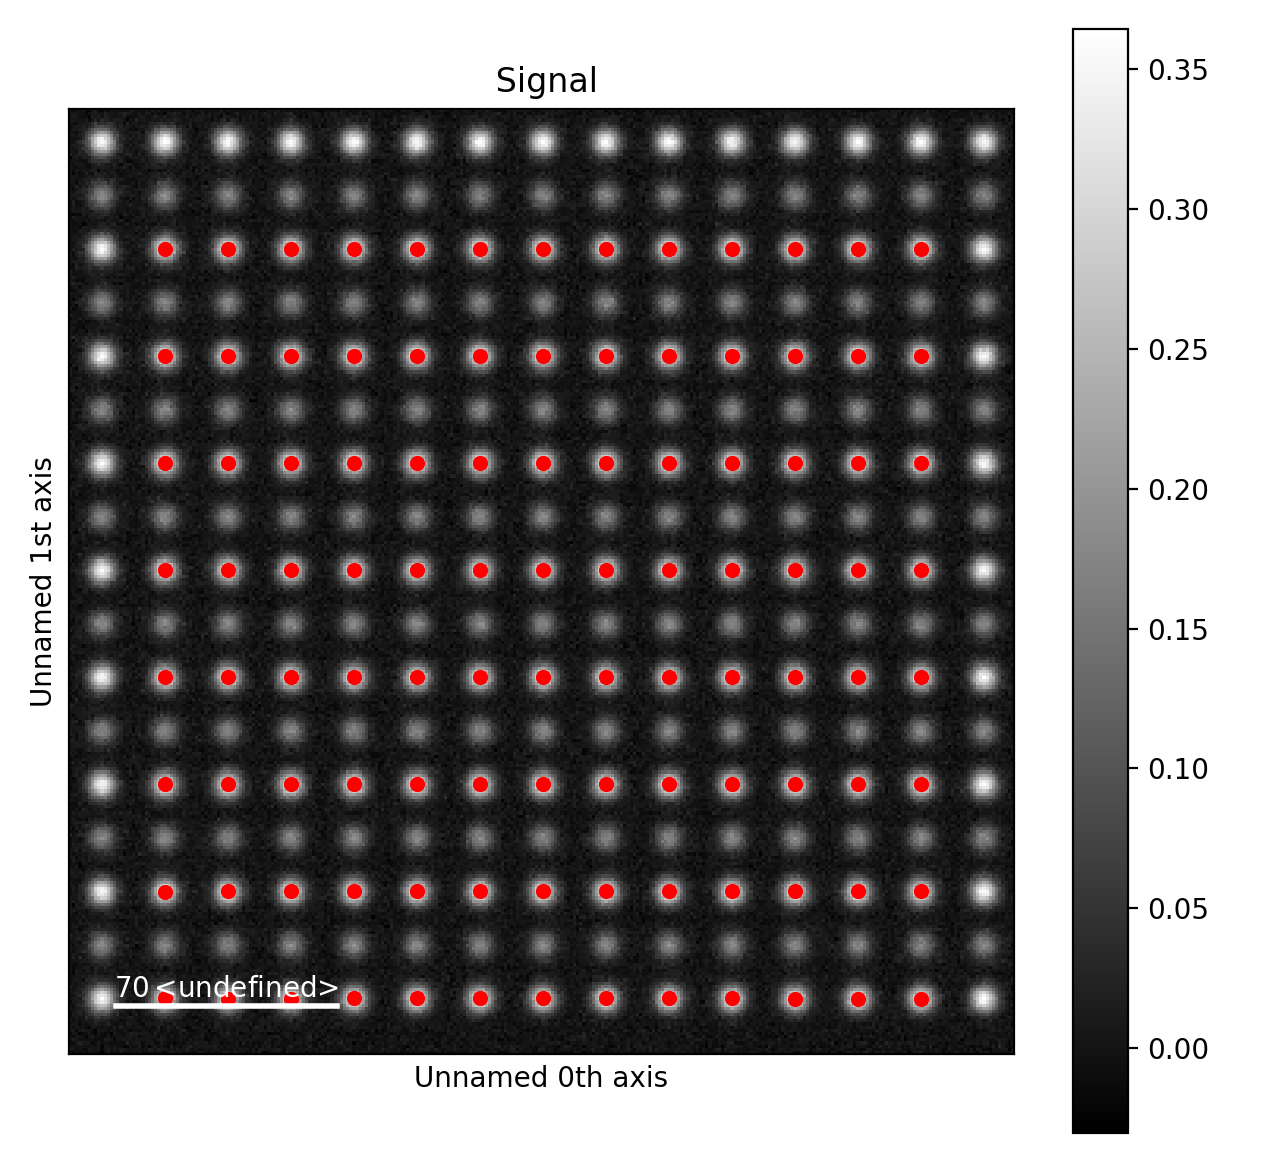

<IPython.core.display.Javascript object>


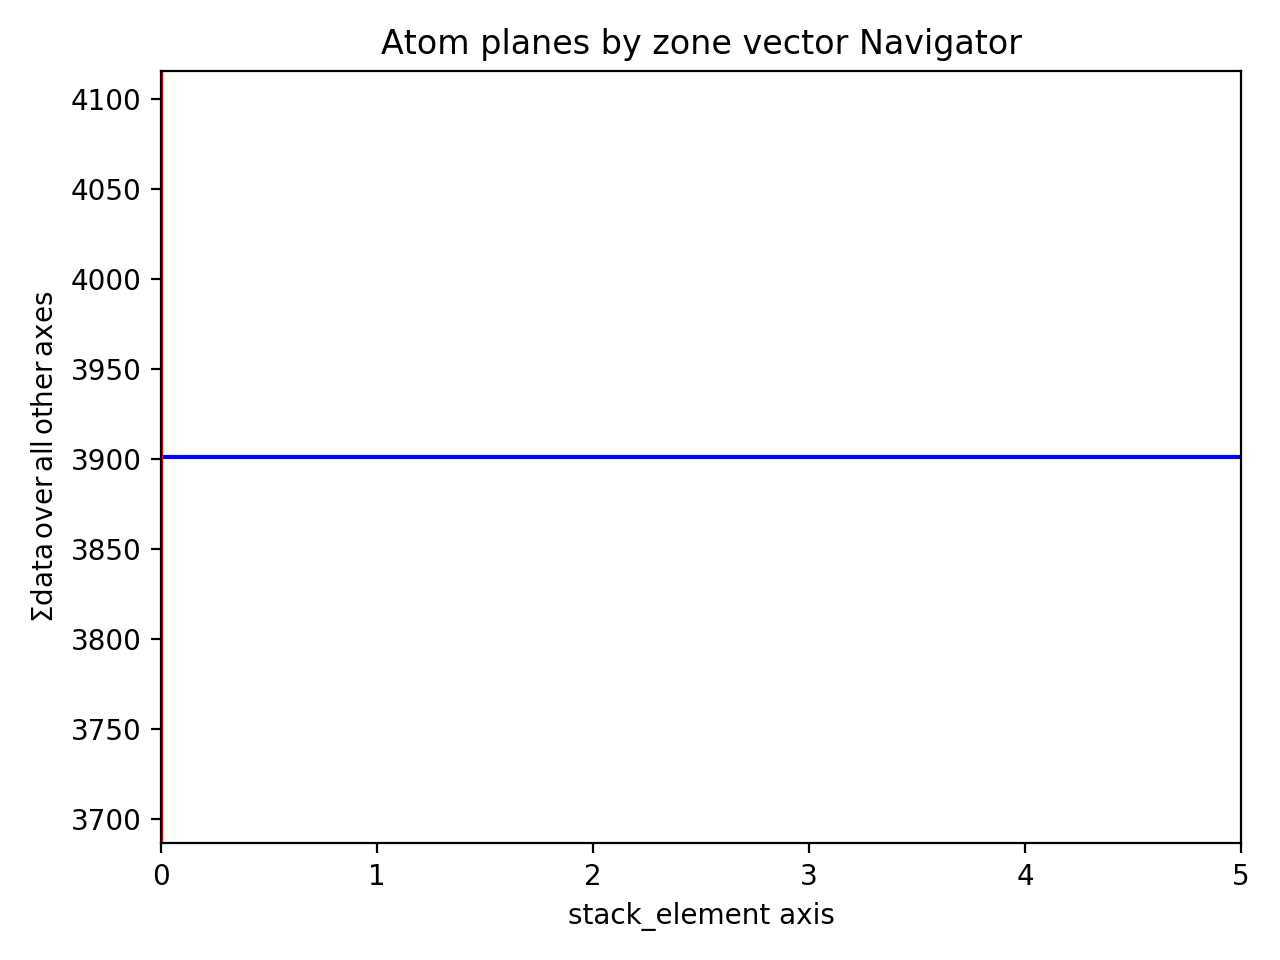

<IPython.core.display.Javascript object>


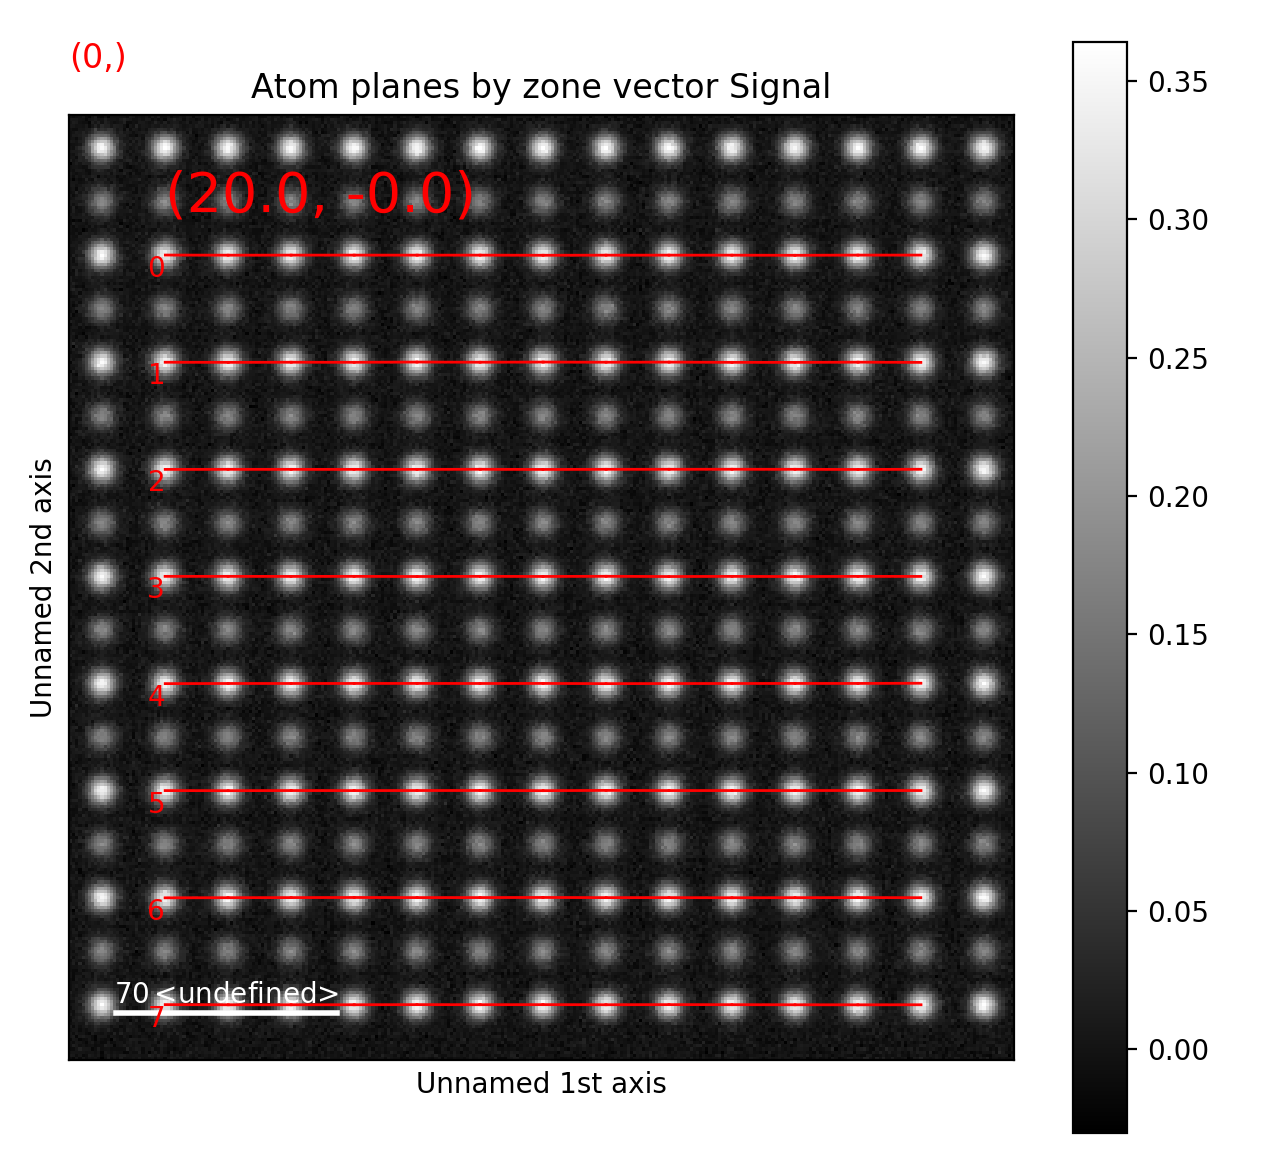

In [23]:
>>> s = dummy_data.get_two_sublattice_signal()
>>> A_positions = am.get_atom_positions(s, separation=15)
>>> sublattice_A = am.Sublattice(A_positions, image=s.data, color='r')
>>> sublattice_A.find_nearest_neighbors()
>>> sublattice_A.refine_atom_positions_using_center_of_mass()
>>> sublattice_A.refine_atom_positions_using_2d_gaussian()
>>> sublattice_A.construct_zone_axes()
>>> sublattice_A.plot()
>>> sublattice_A.plot_planes()

In [24]:
>>> zone_axis_001 = sublattice_A.zones_axis_average_distances[1]
>>> B_positions = sublattice_A.find_missing_atoms_from_zone_vector(zone_axis_001)

In [25]:
>>> from atomap.tools import remove_atoms_from_image_using_2d_gaussian
>>> image_without_A = remove_atoms_from_image_using_2d_gaussian(sublattice_A.image, sublattice_A)

Subtracting atoms: 100%|██████████| 104/104 [00:02<00:00, 44.15it/s]


In [26]:
>>> sublattice_B = am.Sublattice(B_positions, image_without_A, color='blue')
>>> sublattice_B.construct_zone_axes()
>>> sublattice_B.refine_atom_positions_using_center_of_mass()
>>> sublattice_B.refine_atom_positions_using_2d_gaussian()

Gaussian fitting: 100%|██████████| 91/91 [00:01<00:00, 47.73it/s]


<IPython.core.display.Javascript object>


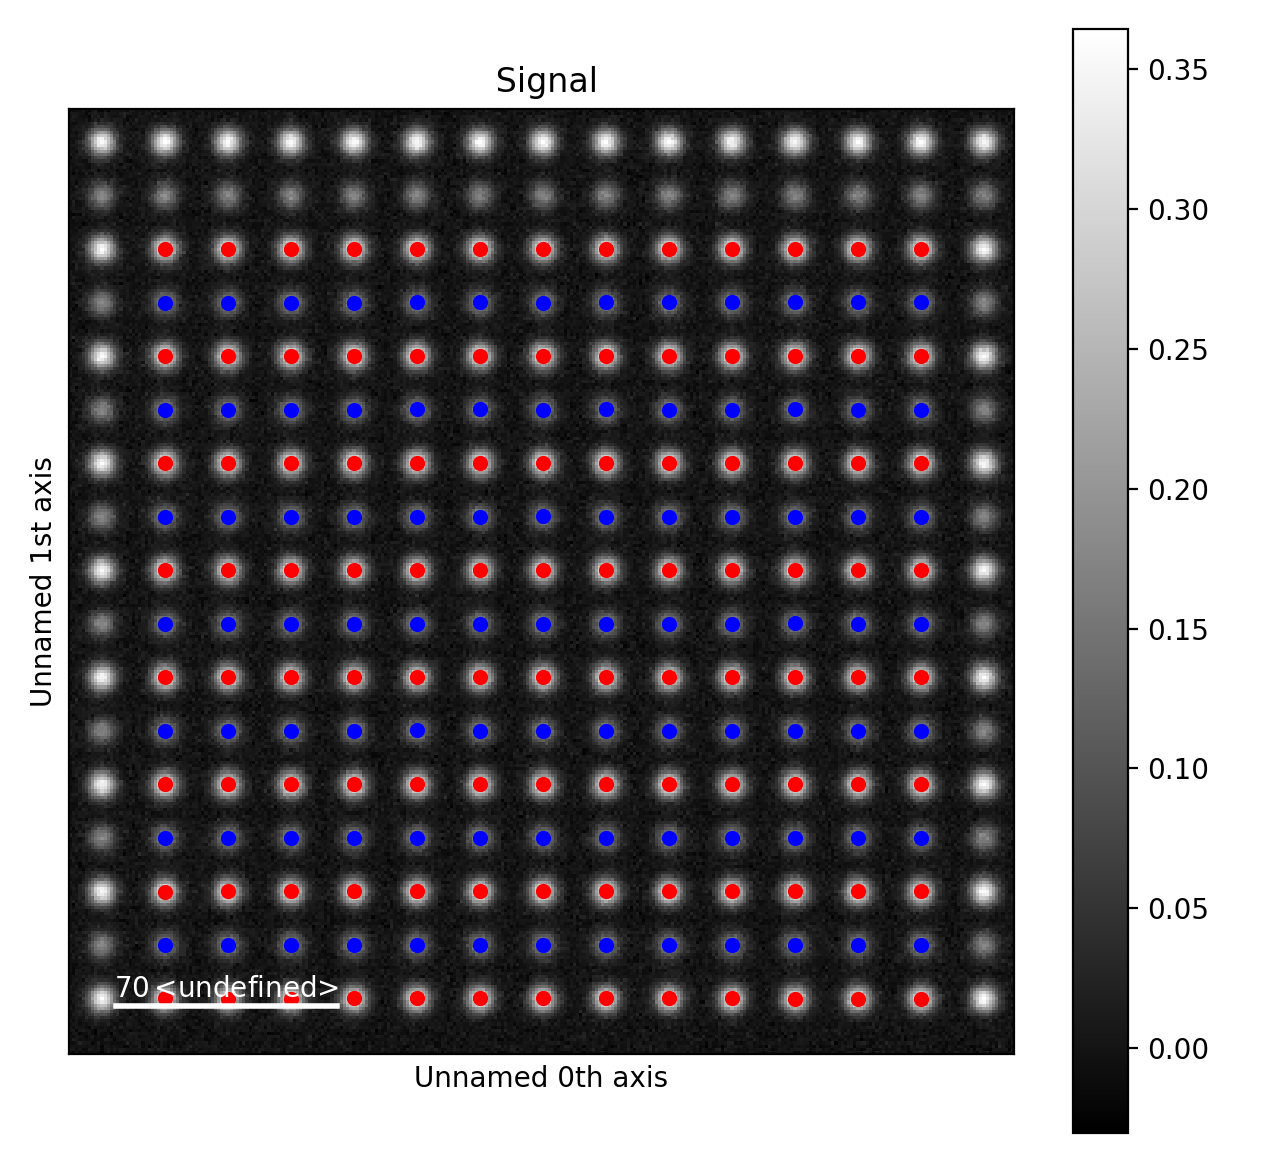

In [27]:
>>> atom_lattice = am.Atom_Lattice(image=s.data, name='test', sublattice_list=[sublattice_A, sublattice_B])
>>> atom_lattice.plot()

In [30]:
>>> zone = sublattice_A.zones_axis_average_distances[1]
>>> plane = sublattice_A.atom_planes_by_zone_vector[zone][7]
>>> s_elli_line = sublattice_A.get_ellipticity_line_profile(plane)

In [31]:
>>> position = s_elli_line.metadata.line_profile_data.x_list
>>> ellipticity = s_elli_line.metadata.line_profile_data.y_list
>>> standard_deviation = s_elli_line.metadata.line_profile_data.std_list

<IPython.core.display.Javascript object>


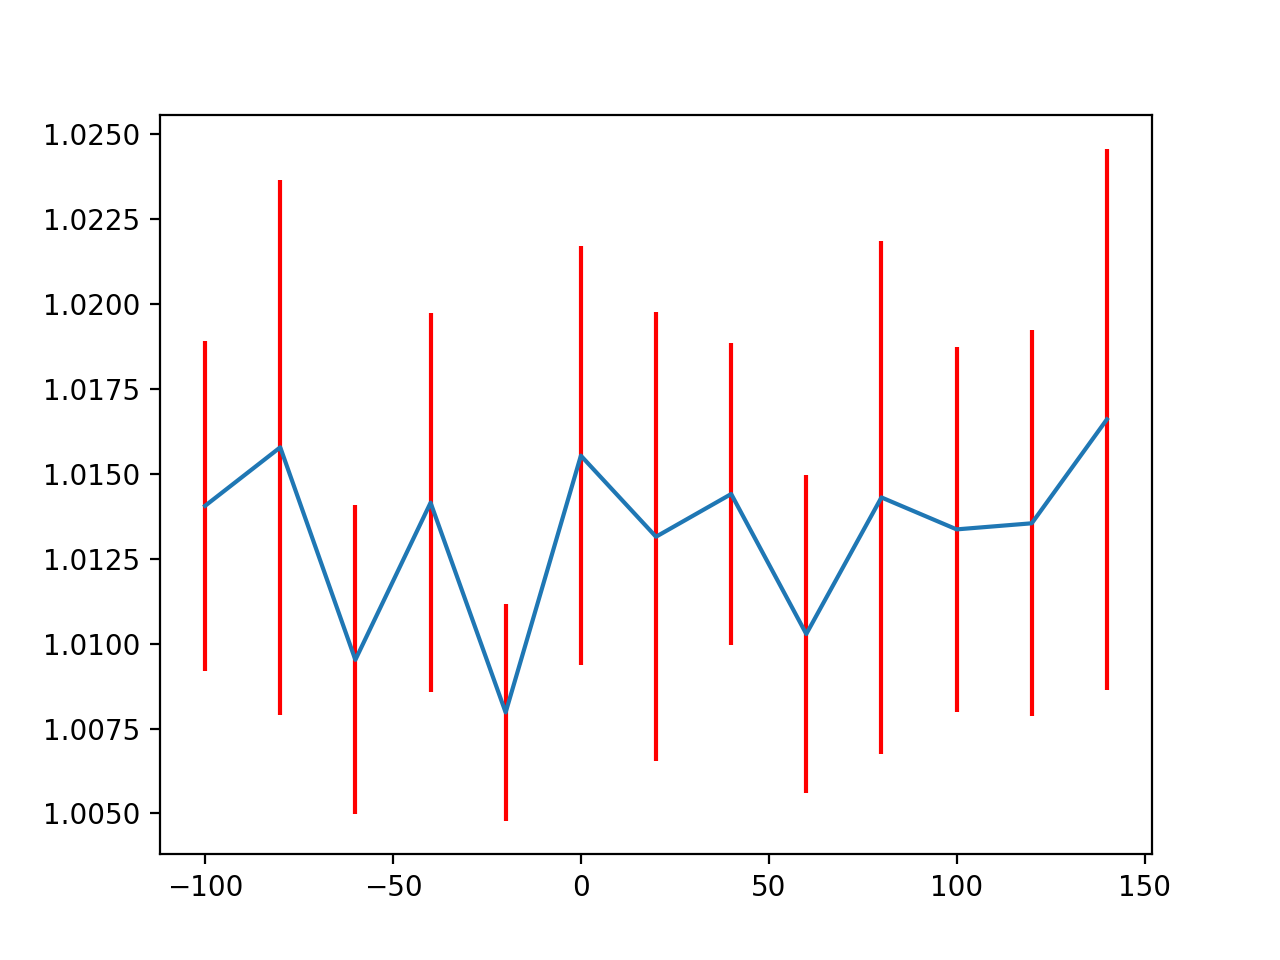

In [32]:
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots()
>>> _ = ax.errorbar(position, ellipticity, yerr=standard_deviation, ecolor='red')
>>> fig.show()

In [33]:
>>> zone = sublattice_B.zones_axis_average_distances[1]
>>> plane = sublattice_B.atom_planes_by_zone_vector[zone][0]
>>> s_monolayer_line = sublattice_B.get_monolayer_distance_line_profile(zone, plane)

In [34]:
>>> zone = sublattice_B.zones_axis_average_distances[1]
>>> plane = sublattice_B.atom_planes_by_zone_vector[zone][-1]
>>> s_dd_line = sublattice_B.get_atom_distance_difference_line_profile(zone, plane)